# Part 3: Visualization&EDA

In [1]:
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#reading the CSV
Readyforvisualization = "mergeData.csv"
df = pd.read_csv(Readyforvisualization)

(23.72, 27.91]     42879
(19.53, 23.72]     17800
(27.91, 32.1]      14995
(15.34, 19.53]      9583
(11.15, 15.34]      8715
(6.96, 11.15]       6444
(2.77, 6.96]        4771
(-1.42, 2.77]       2106
(-5.61, -1.42]       617
(-9.842, -5.61]      158
Name: temp, dtype: int64
count    108068.000000
mean         21.374502
std           7.611597
min          -9.800000
25%          17.500000
50%          24.200000
75%          26.800000
max          32.100000
Name: temp, dtype: float64


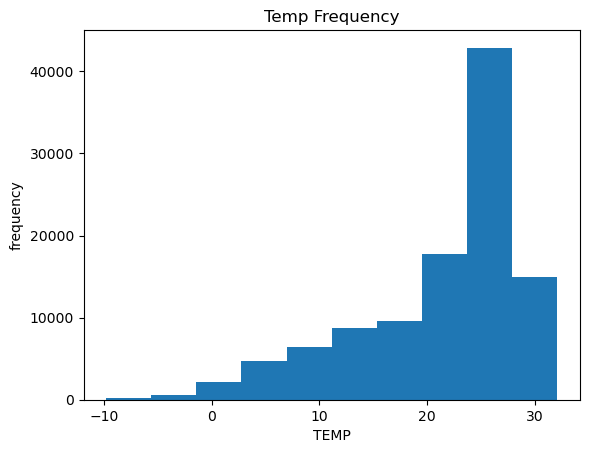

In [3]:
#info about temp
print(pd.cut(df["temp"], bins=10).value_counts())
pd.cut(df["temp"], bins=10).value_counts()
plt.hist(df["temp"],bins=10)
plt.xlabel("TEMP")
plt.ylabel("frequency")
plt.title('Temp Frequency')
print(df.temp.describe())

count    108068.000000
mean         64.940773
std          12.676755
min          19.800000
25%          56.800000
50%          65.800000
75%          74.200000
max          97.900000
Name: humidity, dtype: float64


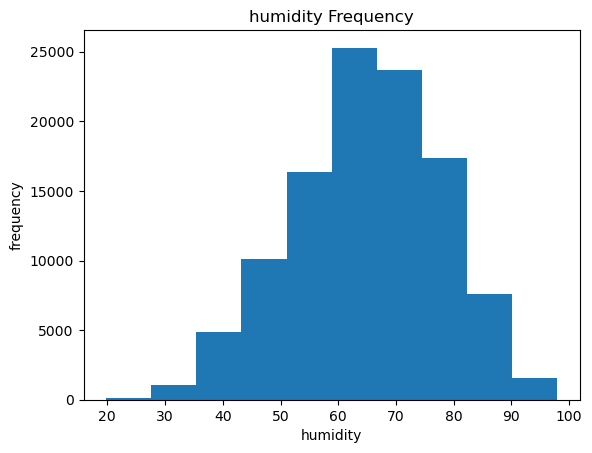

In [4]:
#info about humidity
pd.cut(df["humidity"], bins=10).value_counts()
plt.hist(df["humidity"],bins=10)
plt.xlabel("humidity")
plt.ylabel("frequency")
plt.title('humidity Frequency')
print(df.humidity.describe())


count    108068.000000
mean         21.609321
std           7.536363
min           4.300000
25%          16.200000
50%          20.400000
75%          25.000000
max          69.000000
Name: windspeed, dtype: float64


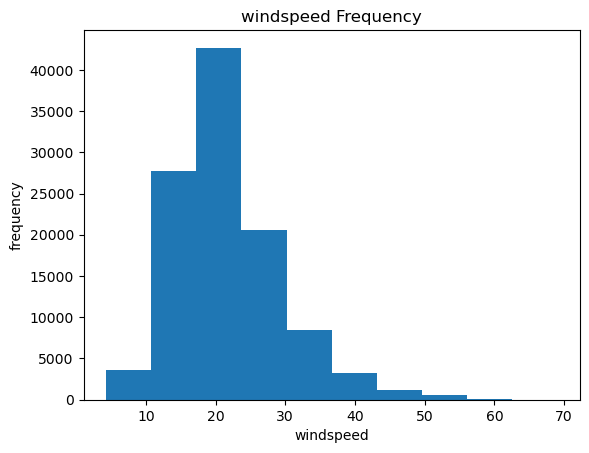

In [5]:
#info about windspeed
pd.cut(df["windspeed"], bins=10).value_counts()
plt.hist(df["windspeed"],bins=10)
plt.xlabel("windspeed")
plt.ylabel("frequency")
plt.title('windspeed Frequency')
print(df.windspeed.describe())


<AxesSubplot:xlabel='windspeed', ylabel='temp'>

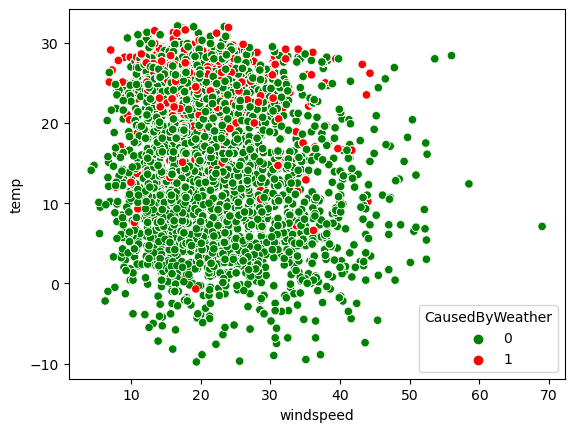

In [6]:
#scatterplot to see how windspeed and tempature affect on the fire cause
sns.scatterplot(data=df,x="windspeed", y="temp", hue="CausedByWeather",
                    palette=['green','red'], legend='full')
# its easy to see that natural fires are more common when windspeed is lower and tempature is higher

Text(0.5, 1.0, 'Fire Cause Analysis')

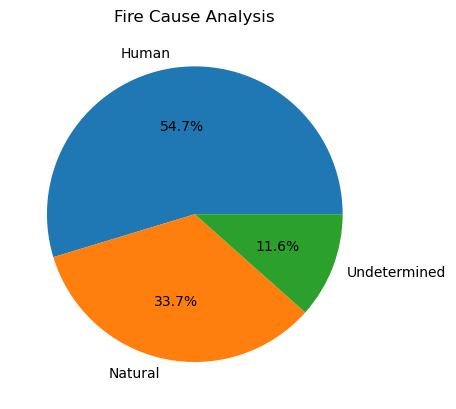

In [7]:
#pie chart info about firecause
fireCause = df.FireCause.value_counts().sort_index()
data = fireCause.to_list()
labels = ['Human', 'Natural', 'Undetermined']
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Fire Cause Analysis')

Text(0, 0.5, 'Relative frequency')

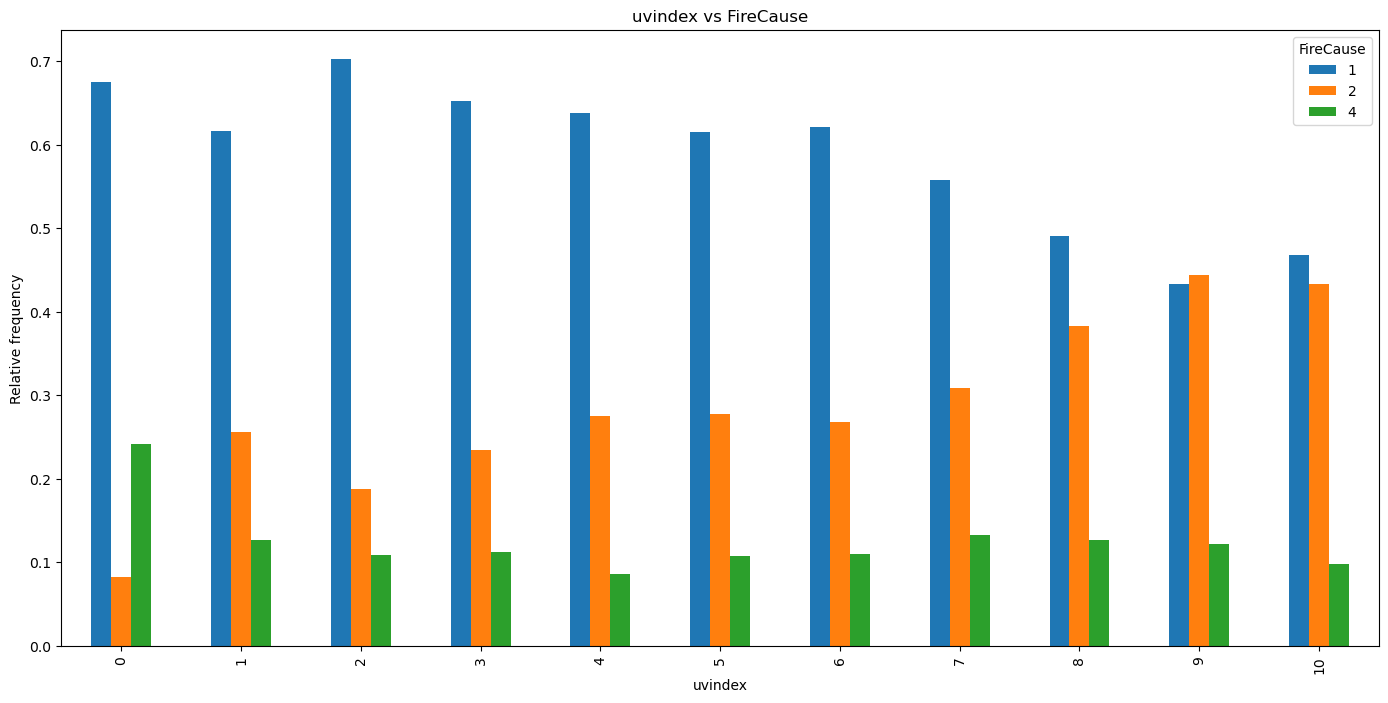

In [8]:
#when uvindex is higher, wildfire by weather are more likely to happen(orange)
ct2=pd.crosstab(df['uvindex'], df["FireCause"], normalize='index')
ct2.plot(kind='bar',figsize=(17, 8))
plt.title("uvindex vs FireCause")
plt.xlabel("uvindex")
plt.ylabel("Relative frequency")

<AxesSubplot:xlabel='humidity', ylabel='temp'>

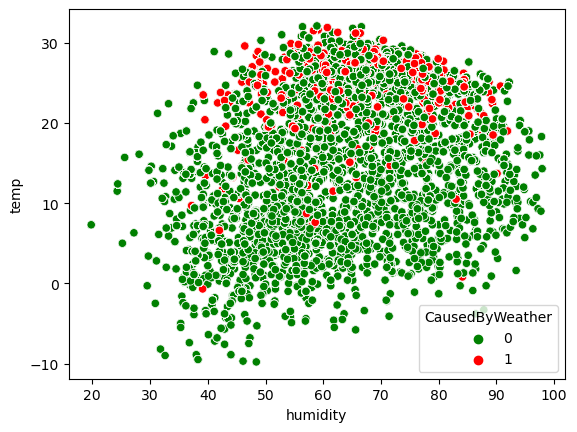

In [9]:
#scatterplot to see connection between humidity and temp on the fire cause
sns.scatterplot(data=df, x="humidity", y="temp", hue="CausedByWeather", palette=['green','red'])
#we can see that natural fires are more common when humidity and temp are higher

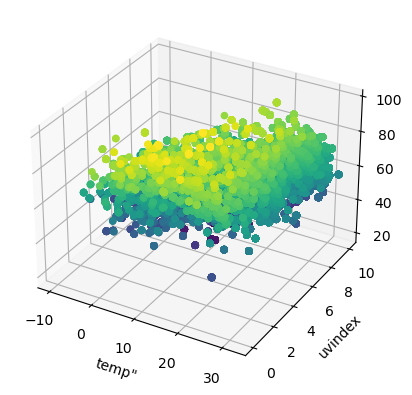

In [10]:
#3d to see connection between 3 main reasons for weather fire
ax = plt.axes (projection='3d')
xdata = df.temp
ydata = df.uvindex
zdata = df.humidity
plt.xlabel('temp"')
plt.ylabel('uvindex')
ax.scatter3D(xdata, ydata, zdata, c=zdata, depthshade=False)